In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Load the dataset
df = pd.read_csv("..\\Data\\BrentOilPrices.csv")
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [57]:
df['Date'] = df['Date'].str.strip()

In [58]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8360 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


In [60]:
# Drop bad rows
df = df.dropna(subset=['Date'])

# Set index
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Check for duplicates
print("Duplicate dates:", df.index.duplicated().sum())


Duplicate dates: 0


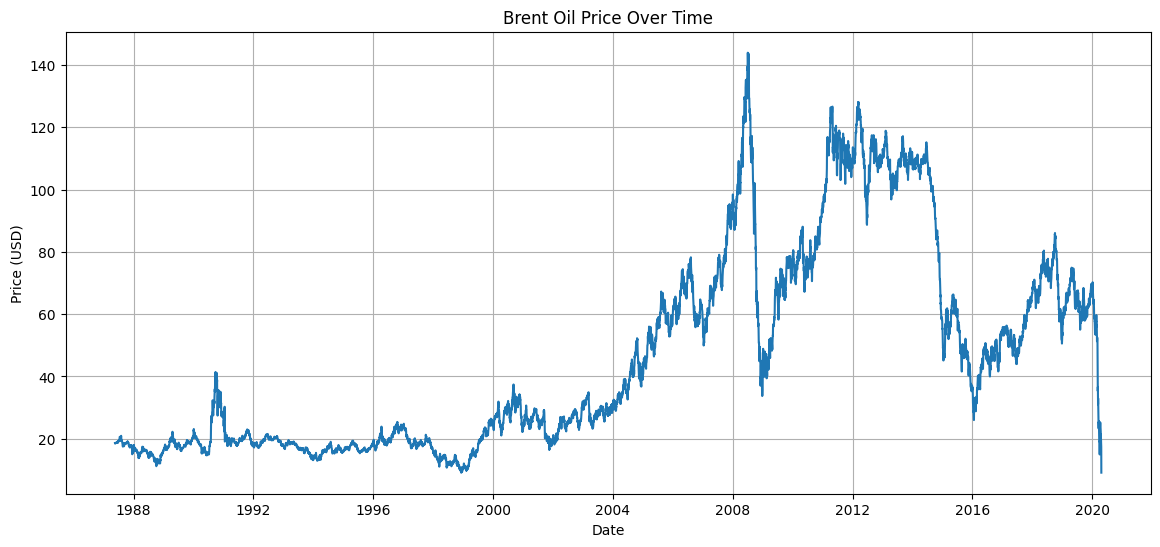

In [61]:
plt.figure(figsize=(14, 6))
plt.plot(df['Price'])
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

ADF Test for Stationarity

In [63]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.0186531355212662
p-value: 0.27845471012993195


If p-value < 0.05, data is stationary. This data is not stationary

STL Decomposition

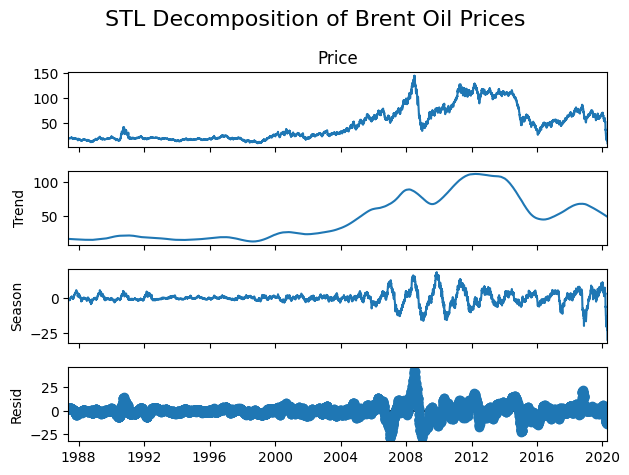

In [81]:
from statsmodels.tsa.seasonal import STL

# STL decomposition
stl = STL(df['Price'], period=365)  # Adjust period if needed
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle('STL Decomposition of Brent Oil Prices', fontsize=16)
plt.tight_layout()
plt.show()


In [64]:
df['Price_diff'] = df['Price'].diff()
df.head()

,Price,Price_diff
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.18
1987-05-22,18.55,0.10
1987-05-25,18.60,0.05
1987-05-26,18.63,0.03


Event Data

In [73]:
event_data = pd.read_csv('../data/event.csv')
event_data.head()

,event_name,start_date,description
0,Gulf War Begins,1990-08-02,Iraq invades Kuwait
1,9/11 Attacks,2001-09-11,Twin Towers attack
2,Global Financial Crisis,2008-09-15,Lehman Brothers collapse
3,Arab Spring,2011-01-01,MENA political unrest
4,COVID-19 Declared,2020-03-11,COVID-19 pandemic begins


In [74]:
event_data['start_date'] = pd.to_datetime(event_data['start_date'])

In [75]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_name   6 non-null      object        
 1   start_date   6 non-null      datetime64[ns]
 2   description  6 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 276.0+ bytes


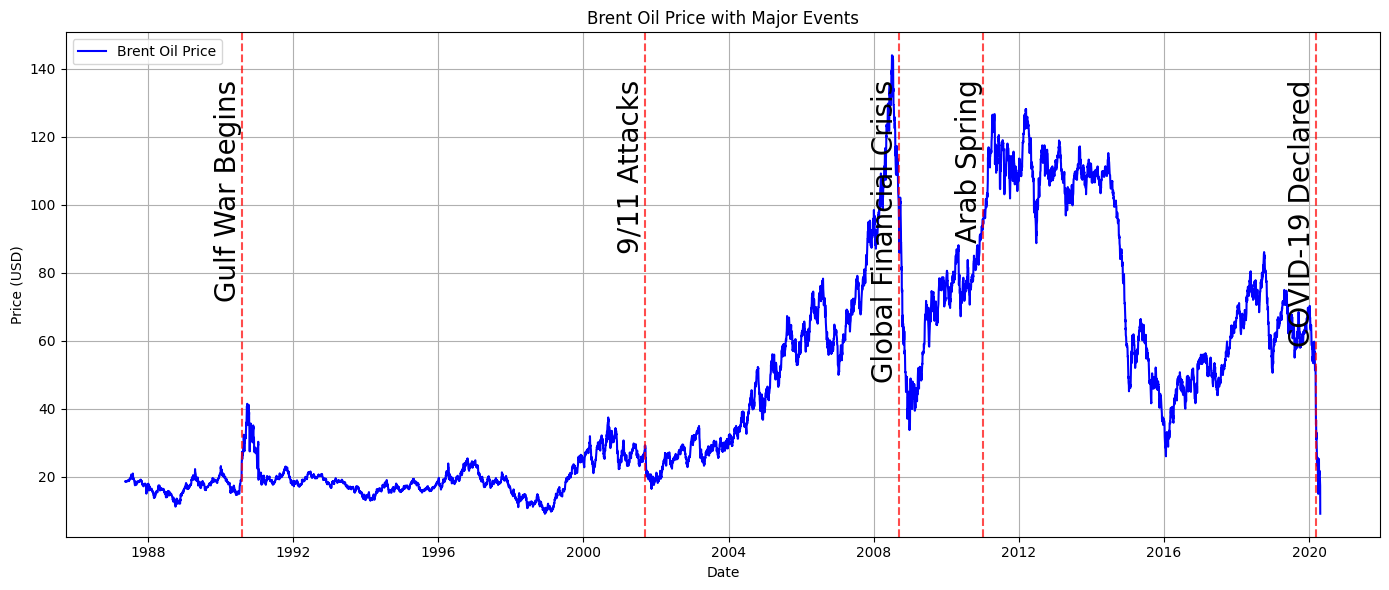

In [79]:
# Plot Brent oil price
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')

for _, row in event_data.iterrows():
    if row['start_date'] >= df.index.min() and row['start_date'] <= df.index.max():
        plt.axvline(row['start_date'], color='red', linestyle='--', alpha=0.7)
        plt.text(row['start_date'], df['Price'].max() * 0.95, row['event_name'],
                 rotation=90, verticalalignment='top', horizontalalignment='right',
                 fontsize=20, color='black')

plt.title("Brent Oil Price with Major Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
